# Ejercicio perdidos en el espacio.
    

    

In [70]:
# importamos las librerias necesarias
import pandas as pd
import faker as fk
import random as rd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import openpyxl

In [71]:
planetas = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}


In [72]:
# Para el apartado A
L1 = 1.00
t1 = 0.46
g_a = 2*L1 / (t1**2)
print("La aceleración de la gravedad es: ", g_a)

La aceleración de la gravedad es:  9.45179584120983


In [73]:
# Para el apartado B
L2 = 2.00
t2 = 0.66
g_b = 2*L2 / (t2**2)
print("La aceleración de la gravedad es: ", g_b)

La aceleración de la gravedad es:  9.182736455463727


In [74]:
# creamos un dataframe con los datos
df = pd.DataFrame({
    'Longitud': [L1, L2],
    'Tiempo': [t1, t2],
    'Gravedad': [g_a, g_b],
    'Planeta más cercano': ['Tierra', 'Saturno'],
    '2ndo más cercano': ['Saturno', 'Tierra']},
    index= ['Escenario A', 'Escenario B'])
df

,Longitud,Tiempo,Gravedad,Planeta más cercano,2ndo más cercano
Escenario A,1.0,0.46,9.451796,Tierra,Saturno
Escenario B,2.0,0.66,9.182736,Saturno,Tierra


In [75]:
# genero datos aleatorios para el primer escenario
fake = fk.Faker()

def generar_datos():
    L = round(rd.uniform(0.7, 2.5), 2)
    t = round(rd.uniform(0.3, 0.8), 2)
    g_calculada = round((2*L) / (t**2), 2)
    planeta_mas_cercano = 'Tierra' if abs(g_calculada < 9.8) < abs(g_calculada - 9.0) else 'Tierra'
    segundo_mas_cercano ='Saturno' if planeta_mas_cercano == 'Tierra' else 'Saturno'
    return {
        'Id': fake.uuid4(),
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': g_calculada,
        'Planeta más cercano': planeta_mas_cercano,
        '2ndo más cercano': segundo_mas_cercano
    }


dataframe = [generar_datos() for _ in range(1000)]

for experimento in dataframe:
    print(experimento)
    

{'Id': '16c56adb-08a4-4212-ad53-bd4a0b30e7aa', 'Longitud (m)': 0.76, 'Tiempo (s)': 0.34, 'Gravedad (m/s^2)': 13.15, 'Planeta más cercano': 'Tierra', '2ndo más cercano': 'Saturno'}
{'Id': '0f19741c-fb82-4471-992d-eb44097fa764', 'Longitud (m)': 1.72, 'Tiempo (s)': 0.76, 'Gravedad (m/s^2)': 5.96, 'Planeta más cercano': 'Tierra', '2ndo más cercano': 'Saturno'}
{'Id': 'a9aa7cce-129b-44ec-bcd9-806f24c22cef', 'Longitud (m)': 2.47, 'Tiempo (s)': 0.41, 'Gravedad (m/s^2)': 29.39, 'Planeta más cercano': 'Tierra', '2ndo más cercano': 'Saturno'}
{'Id': '2110b45f-ae72-4805-8610-66816881417c', 'Longitud (m)': 0.87, 'Tiempo (s)': 0.35, 'Gravedad (m/s^2)': 14.2, 'Planeta más cercano': 'Tierra', '2ndo más cercano': 'Saturno'}
{'Id': '760200ed-c4c1-410c-bbae-7d5e8a5e8b9d', 'Longitud (m)': 1.98, 'Tiempo (s)': 0.66, 'Gravedad (m/s^2)': 9.09, 'Planeta más cercano': 'Tierra', '2ndo más cercano': 'Saturno'}
{'Id': '6630be25-785d-4ff8-9aec-d2443396d5f3', 'Longitud (m)': 2.32, 'Tiempo (s)': 0.63, 'Gravedad (m/s

In [76]:
# creamos un archivo excel con los datos
def crear_excel():
    df = pd.DataFrame(dataframe)
    df.to_excel('Datos_experimentos.xlsx', index=False)
    print('Archivo creado con éxito')

crear_excel()

Archivo creado con éxito


In [77]:
df = pd.DataFrame(dataframe)
df

,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,2ndo más cercano
0,16c56adb-08a4-4212-ad53-bd4a0b30e7aa,0.76,0.34,13.15,Tierra,Saturno
1,0f19741c-fb82-4471-992d-eb44097fa764,1.72,0.76,5.96,Tierra,Saturno
2,a9aa7cce-129b-44ec-bcd9-806f24c22cef,2.47,0.41,29.39,Tierra,Saturno
3,2110b45f-ae72-4805-8610-66816881417c,0.87,0.35,14.20,Tierra,Saturno
4,760200ed-c4c1-410c-bbae-7d5e8a5e8b9d,1.98,0.66,9.09,Tierra,Saturno
...,...,...,...,...,...,...
995,083749eb-37d8-43a6-bd0b-13a88d68eb49,2.42,0.72,9.34,Tierra,Saturno
996,3378850c-836c-4d60-a2d4-0aec00d97ab6,1.11,0.40,13.87,Tierra,Saturno
997,59b8627b-9705-4c0b-800a-89e0a9555f2f,1.53,0.33,28.10,Tierra,Saturno
998,eecef867-5828-42e9-9537-1065e2fbe4a2,0.87,0.41,10.35,Tierra,Saturno


In [78]:
print(df.describe())

       Longitud (m)   Tiempo (s)  Gravedad (m/s^2)
count   1000.000000  1000.000000       1000.000000
mean       1.557770     0.554080         12.724360
std        0.530275     0.143553          8.884498
min        0.700000     0.300000          2.280000
25%        1.080000     0.430000          6.370000
50%        1.535000     0.555000          9.895000
75%        2.010000     0.680000         16.252500
max        2.500000     0.800000         54.440000


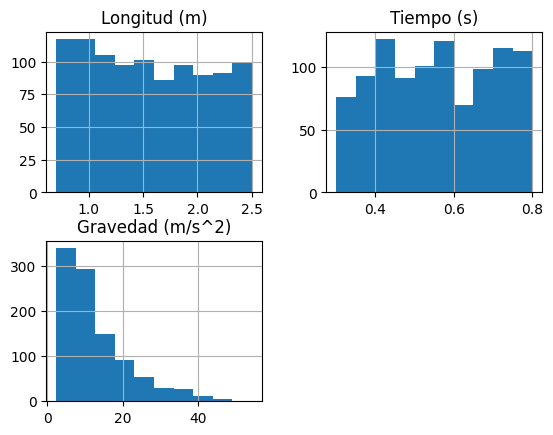

In [79]:
# histogramas
df.hist(column=['Longitud (m)', 'Tiempo (s)', 'Gravedad (m/s^2)'])
plt.show()

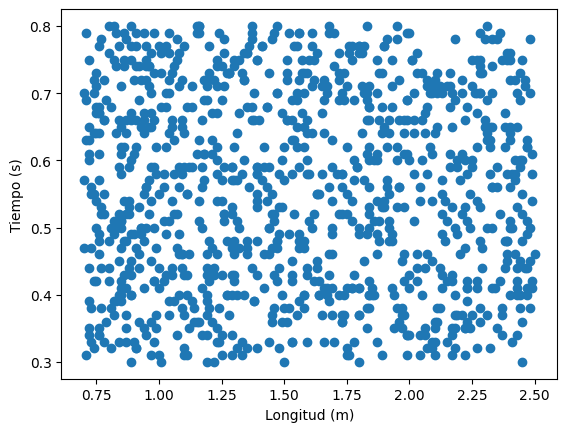

In [80]:
# grafico de dispersion
plt.scatter(df['Longitud (m)'], df['Tiempo (s)'])
plt.xlabel('Longitud (m)')
plt.ylabel('Tiempo (s)')
plt.show()

In [81]:
# codificar etiquetas de planetas 

codificador_etiquetas = LabelEncoder()
df['Planeta más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['Planeta más cercano'])
df['2ndo más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['2ndo más cercano'])


In [82]:
# correlación entre variables 
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric.corr())


                              Longitud (m)  Tiempo (s)  Gravedad (m/s^2)   
Longitud (m)                      1.000000   -0.019008          0.494931  \
Tiempo (s)                       -0.019008    1.000000         -0.777270   
Gravedad (m/s^2)                  0.494931   -0.777270          1.000000   
Planeta más cercano (codigo)           NaN         NaN               NaN   
2ndo más cercano (codigo)              NaN         NaN               NaN   

                              Planeta más cercano (codigo)   
Longitud (m)                                           NaN  \
Tiempo (s)                                             NaN   
Gravedad (m/s^2)                                       NaN   
Planeta más cercano (codigo)                           NaN   
2ndo más cercano (codigo)                              NaN   

                              2ndo más cercano (codigo)  
Longitud (m)                                        NaN  
Tiempo (s)                                          Na

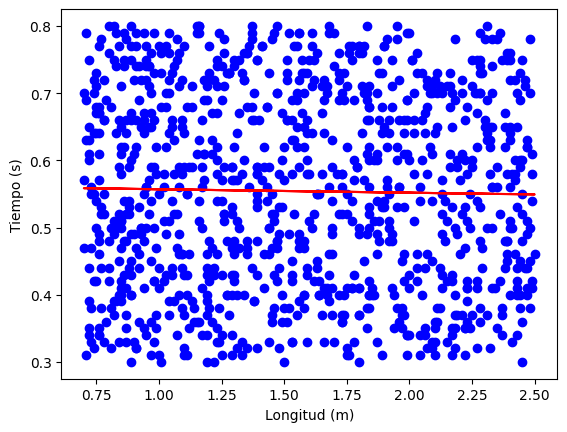

In [83]:
# regresion lineal 
X = df['Longitud (m)'].values.reshape(-1, 1)
y = df['Tiempo (s)'].values.reshape(-1, 1)
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)

y_pred = regresion_lineal.predict(X)
plt.scatter(X, y, color='blue') 
plt.plot(X, y_pred, color='red')
plt.xlabel('Longitud (m)')
plt.ylabel('Tiempo (s)')
plt.show()